In [2]:
import sys

sys.path.insert(0, '/Users/farbodabolhassani/Documents/work/televu/pytorch-openpose/venv/lib/python3.8/site-packages')
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
import math

sys.path.insert(0, '../')
from src import model
from src import util
from src.body import Body
from src.hand import Hand

body_estimation = Body('../model/body_pose_model.pth')

In [13]:
body_estimation.model

bodypose_model(
  (model0): Sequential(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv1_1): ReLU(inplace=True)
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv1_2): ReLU(inplace=True)
    (pool1_stage1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv2_1): ReLU(inplace=True)
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv2_2): ReLU(inplace=True)
    (pool2_stage1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv3_1): ReLU(inplace=True)
    (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv3_2): ReLU(inplace=True)
    (conv3_3): Conv2d(256, 256, kernel_size=

In [4]:
test_image = '../images/demo.jpg'
oriImg = cv2.imread(test_image)

In [12]:
oriImg.shape

(458, 310, 3)

In [17]:
scale_search = [0.5]
boxsize = 368
stride = 8
padValue = 128
thre1 = 0.1
thre2 = 0.05
multiplier = [x * boxsize / oriImg.shape[0] for x in scale_search]
heatmap_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], 19))
paf_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], 38))

In [21]:
scale = multiplier[0]

In [22]:
imageToTest = cv2.resize(oriImg, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

In [23]:
imageToTest.shape

(184, 125, 3)

In [7]:
%%timeit
candidate, subset = body_estimation(oriImg)

850 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%%timeit
candidate, subset = body_estimation(imageToTest)

640 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


CPU times: user 29.8 ms, sys: 4.05 ms, total: 33.8 ms
Wall time: 32.8 ms


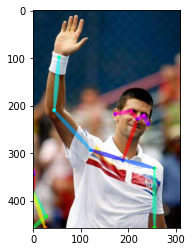

In [8]:
%%time

canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
plt.imshow(canvas[:, :, [2, 1, 0]])

In [2]:
body_estimation = Body('../model/body_pose_model.pth')
#hand_estimation = Hand('../model/hand_pose_model.pth')

In [9]:
#print(f"Torch device: {torch.cuda.get_device_name()}")

cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

while True:
    ret, oriImg = cap.read()
    candidate, subset = body_estimation(oriImg)
    canvas = copy.deepcopy(oriImg)
    canvas = util.draw_bodypose(canvas, candidate, subset)
    cv2.imshow('demo', canvas)
#     plt.imshow(canvas[:, :, [2, 1, 0]])
#     print(plt.show())

    #一个窗口用以显示原视频
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 